## Importing relevant packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Reading the data and extracting time series data

In [ ]:
df = pd.read_csv('EL_Month.csv')

In [ ]:
df1 = df[['Month','Series 1']]
df2 = df[['Month','Series 2']]
data1 = df1['Series 1']

In [ ]:
data = pd.DataFrame(data1, columns=['Series 1'])

Train Test Split

In [ ]:
train_size = int(len(data) * 0.85)
test_size = len(data) - train_size
train, test = data[0:train_size], data[train_size:len(data)]
print(len(train), len(test))

173 31


# Converting Object Data Type into Float

In [ ]:
C = []
for z in range(len(train['Series 1'])):
  a1 = train['Series 1'][z].replace(",","")
  b1 = float(a1)
  #print(b1)
  C.append(b1)

In [ ]:
D = []
for z12 in range(len(train),len(train)+ len(test['Series 1'])):
  #print(z1)
  a1 = test['Series 1'][z12].replace(",","")
  b1 = float(a1)
  #print(b1)
  c1 = test['Series 1'][z12].replace(",","")
  d1 = float(a1)
  #print(d1)
  D.append(d1)

In [ ]:
CD = np.append(C,D)
DC = np.append(C,D)

In [ ]:
Data12 = pd.DataFrame({'Month':df['Month'],'Values':DC})

In [ ]:
dfnew = Data12.set_index('Month')

In [ ]:
#dfnew.head()

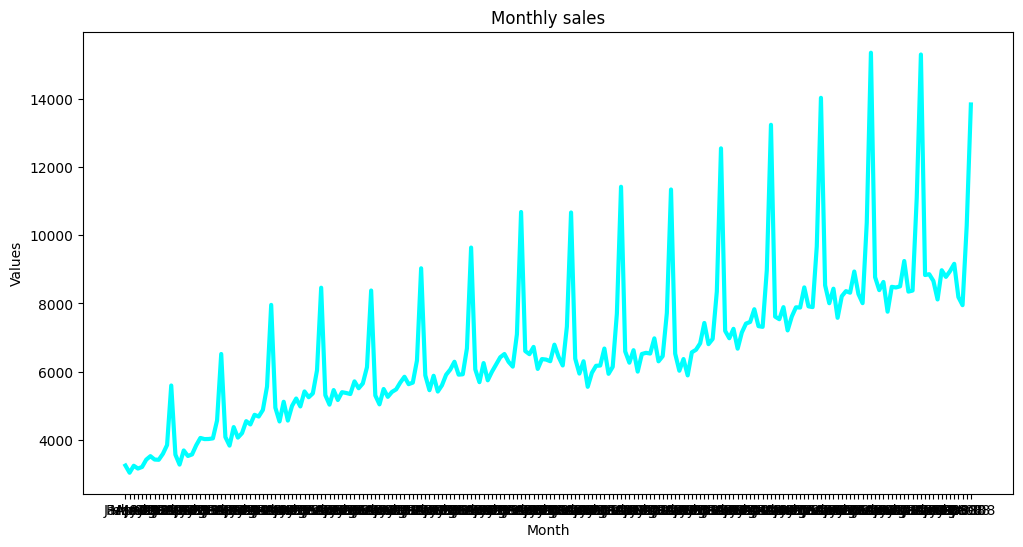

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dfnew['Values'], linewidth=3,c='cyan')
plt.title("Monthly sales")
plt.xlabel("Month")
plt.ylabel("Values")
plt.show()

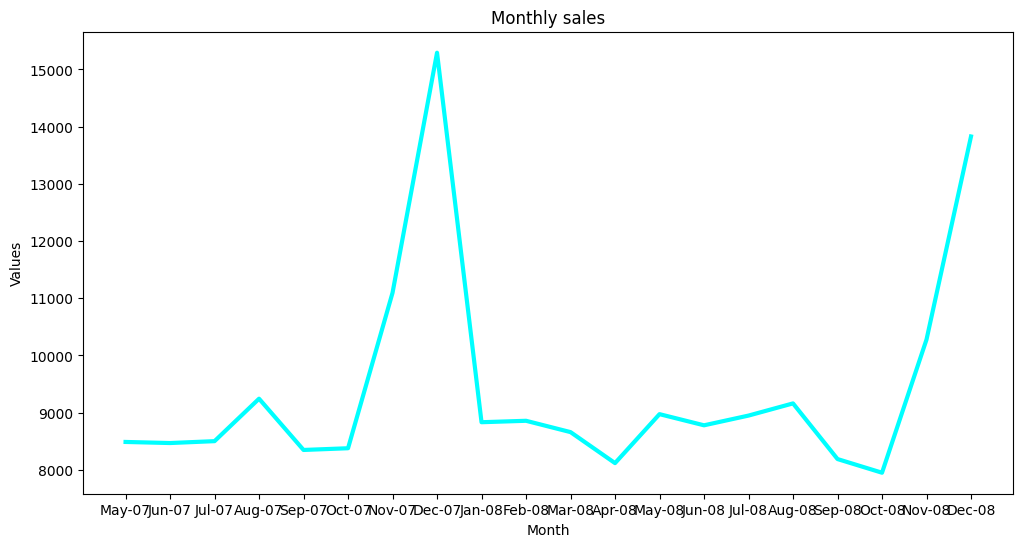

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dfnew['Values'][len(dfnew['Values'])-20:len(dfnew['Values'])], linewidth=3,c='cyan')
#plt.plot(dfnew['Values'][1:5], linewidth=3,c='cyan')
plt.title("Monthly sales")
plt.xlabel("Month")
plt.ylabel("Values")
plt.show()#

In [ ]:
## There seems to be a 12 timestamp seasonality

In [ ]:
len_o = len(CD)

In [ ]:
for i in range(len(CD)):
  a_series = CD[len_o-12:len_o]
  import statistics

  a_mean = statistics.mean(a_series)
  CD = np.append(CD,a_mean)
  if len(CD) >  len_o+12:
    break

In [ ]:
#len(CD)

In [ ]:
Data12 = pd.DataFrame({'Month':df['Month'],'Values':DC})

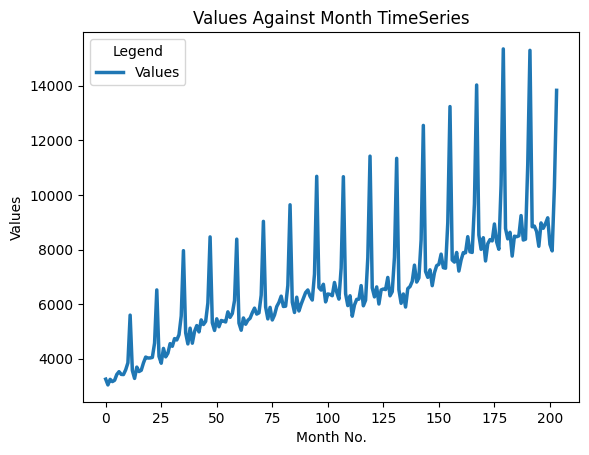

In [ ]:
import seaborn as sns
sns.lineplot(data=Data12[['Month', 'Values']],linewidth=2.5, palette="tab10")

# plot two columns using Seaborn with labels and legend
#sns.lineplot(data=df[['x', 'y1', 'y2']], linewidth=2.5, palette="tab10")
plt.xlabel('Month No.')
plt.ylabel('Values')
plt.title('Values Against Month TimeSeries')
plt.legend(title='Legend', loc='upper left')

In [ ]:
Data3 = Data12.iloc[len(Data12)-40:len(Data12)]

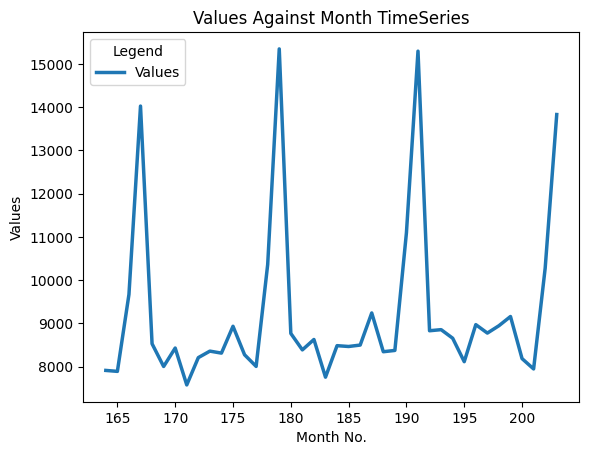

In [ ]:
sns.lineplot(data=Data3[['Month', 'Values']],linewidth=2.5, palette="tab10")

# plot two columns using Seaborn with labels and legend
#sns.lineplot(data=df[['x', 'y1', 'y2']], linewidth=2.5, palette="tab10")
plt.xlabel('Month No.')
plt.ylabel('Values')
plt.title('Values Against Month TimeSeries')
plt.legend(title='Legend', loc='upper left')

# Checking Stationarity of data using Dickey-Fuller Test

In [ ]:
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(Data12['Values'])

ADF Statistic: -1.9282141763448992
p-value: 0.31890686961849724
Non-Stationary


# Decomposing data into 'Trend', 'Seasonal' and 'Residual' components

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Data12['Values'], period=12)

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [ ]:
trend = trend.dropna()
check_stationarity(trend)

ADF Statistic: -1.681121128418797
p-value: 0.44086474570463774
Non-Stationary


In [ ]:
seasonal = seasonal.dropna()
check_stationarity(seasonal)

ADF Statistic: -3652024732011228.5
p-value: 0.0
Stationary


In [ ]:
## Making trend stationary as trend is non-stationary

In [ ]:
trend_diff = trend - trend.shift()

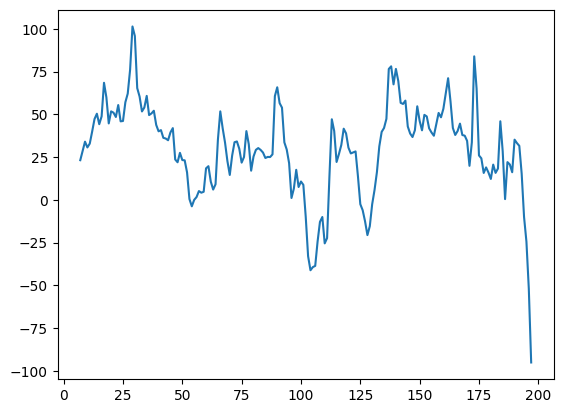

In [ ]:
plt.plot(trend_diff)

# Differentiating 'Trend' to make it Stationary

In [ ]:
trend_diff1 = trend_diff - trend_diff.shift()

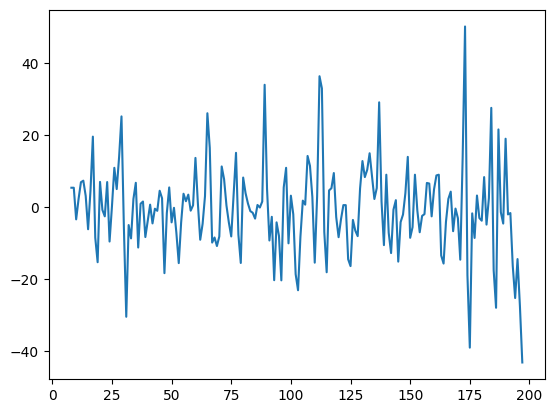

In [ ]:
plt.plot(trend_diff1)

In [ ]:
trend_diff1 = trend_diff1.dropna()
check_stationarity(trend_diff1)

ADF Statistic: -4.487297064876136
p-value: 0.00020729794887776337
Stationary


# ACF and PACF plots for trend and seasonal

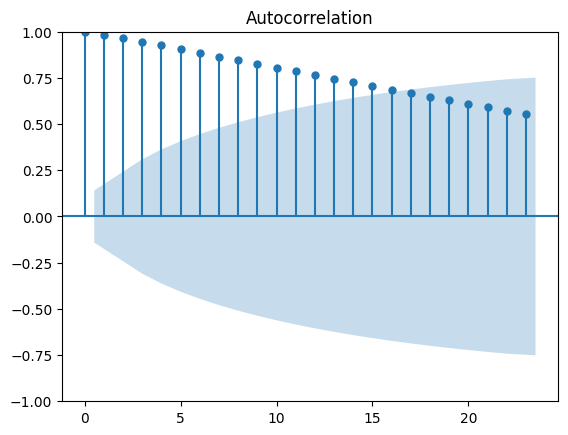

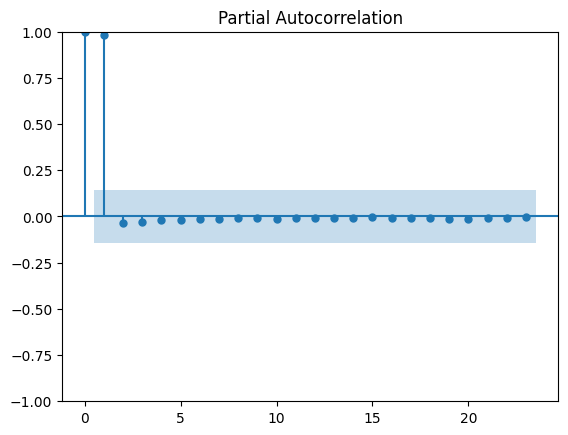

In [ ]:
# Plot ACF and PACF for trend
plot_acf(trend)
plot_pacf(trend)
plt.show()

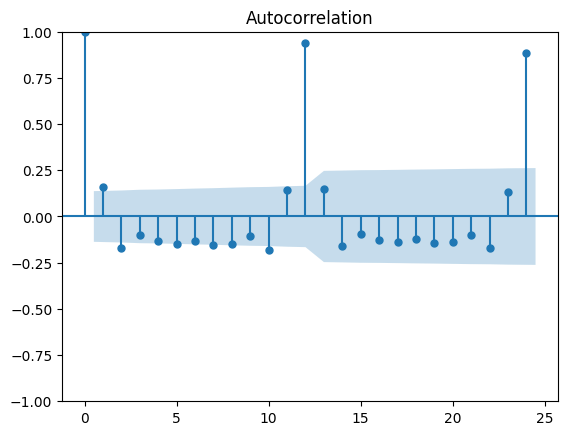

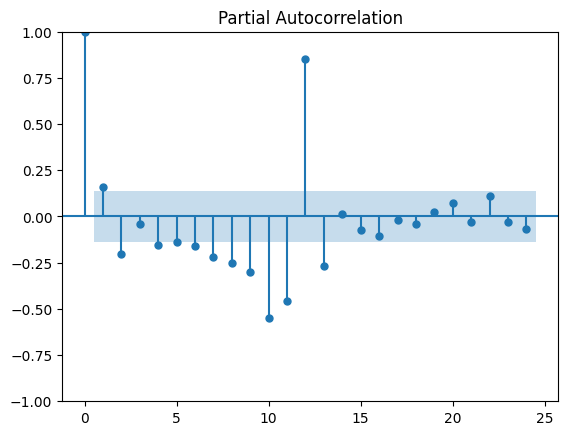

In [ ]:
# Plot ACF and PACF for seasonal
plot_acf(seasonal)
plot_pacf(seasonal)
plt.show()

In [ ]:

# Define SARIMA parameters
p, d, q = 1, 2, 1
P, D, Q, s = 1, 0, 1, 12  # Assuming monthly seasonality

# Fit the SARIMA model
model = SARIMAX(Data12['Values'], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
#model.describe()
print(model)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# one step forecast
yhat = results.forecast()
yhat

204    95831.747567
dtype: float64

# Forecast for next 12 time steps

In [ ]:
# one step forecast
yhat12 = results.predict(start=204, end=215)
yhat12

204     95831.747567
205     93957.656788
206     97558.107871
207     95778.655498
208     99263.770284
209     97701.333230
210    101226.420040
211     99434.992145
212    102879.902001
213    101289.336860
214    104927.220898
215    104485.955944
Name: predicted_mean, dtype: float64

In [ ]:
yhat

204    95831.747567
dtype: float64

In [ ]:
# Forecast future values
forecast_periods = 12  # Forecast the next 12 months
forecast = results.forecast(steps=forecast_periods)
#forecast_mean = forecast.predicted_mean
#forecast_ci = forecast.conf_int()
print("Below are my for forecasts for 12 timesteps :")
print(forecast)

Below are my for forecasts for 12 timesteps :
204     95831.747567
205     93957.656788
206     97558.107871
207     95778.655498
208     99263.770284
209     97701.333230
210    101226.420040
211     99434.992145
212    102879.902001
213    101289.336860
214    104927.220898
215    104485.955944
Name: predicted_mean, dtype: float64
